### Exercise 4. Ensemble Models
#### Use the iris data set from sklearn.

In [31]:
#Loading libraries
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import learning_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Question 21. Load the iris dataset. What are the features?

In [32]:
#Loading dataset

data = pd.DataFrame.from_dict(load_iris(), orient = 'index').T
data

,data,target,target_names,DESCR,feature_names,filename
0,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[setosa, versicolor, virginica]",.. _iris_dataset:\n\nIris plants dataset\n----...,"[sepal length (cm), sepal width (cm), petal le...",C:\Users\dansa\Anaconda3\lib\site-packages\skl...


In [33]:
#column in dataset
data.columns

Index(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'], dtype='object')

### Question 22. Create a DataFrame of given iris dataset

In [34]:
#Loading lists from each column of data1 to indiviual dataframe.
df_feature=pd.DataFrame(data.data[0])
df_target=pd.DataFrame(data.target[0])
df_target_names=pd.DataFrame(data.target_names[0])
df_feature_names=pd.DataFrame(data.feature_names[0],columns=['Feature_name'])
df_feature.columns=['sepal_length','sepal_width','petal_length','petal_width']
print(df_feature.head())
print(df_feature_names)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
        Feature_name
0  sepal length (cm)
1   sepal width (cm)
2  petal length (cm)
3   petal width (cm)


In [35]:
#columns and rows for data feature
print(df_feature.shape)
print(df_target.shape)


(150, 4)
(150, 1)


### Question 23. Split the dataset into training and test sets (30%)

In [36]:
data2= load_iris()
X=pd.DataFrame(data2.data)
Y=pd.DataFrame(data2.target)

#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Question 24. Create a Gaussian RandomForestClassifier as clf (2,000 estimators and a depth of 2).

In [37]:
rf=RandomForestClassifier(n_estimators=2000, max_depth=2) # for parametes (n_estimators=2000, max_depth=2)

In [38]:
rf.fit(X_train,Y_train)
predicted=rf.predict(X_test)

### Question 25. Determine the feature importance. Which one is the most important?

In [39]:
rf_feature_imp = pd.Series(rf.feature_importances_,index=df_feature_names.Feature_name).sort_values(ascending=False)
rf_feature_imp

Feature_name
petal width (cm)     0.464755
petal length (cm)    0.409528
sepal length (cm)    0.110643
sepal width (cm)     0.015074
dtype: float64

No handles with labels found to put in legend.


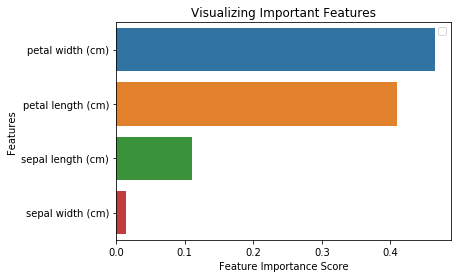

In [40]:
#Feature importance for Random Forest Model
# Creating a bar plot
sns.barplot(x=rf_feature_imp, y=rf_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Amongst all four features , it seems "petal width (cm)" is most important for Random Forest regression model.

### Question 26. Use scikitlearn to determine the accuracy level. What is your assessment?

In [41]:
#Check accuracy
print("Accuracy of Random forest classfier model: %.2f" % accuracy_score(Y_test,predicted))

Accuracy of Random forest classfier model: 0.96


### Question 27. Use the Gradient Boosting and the ExtraTrees classifiers to fit the models and predict test data

#### Gradient Boosting Classifier

In [42]:
#Fitting model
gb= GradientBoostingClassifier(n_estimators=2000, max_depth=2)# for parametes (n_estimators=2000, max_depth=2)
gb.fit(X_train,Y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [43]:
#making predictions
gb_pred=gb.predict(X_test)

#### Extra trees Classifier

In [44]:
#Fitting model
et= ExtraTreesClassifier(n_estimators=2000, max_depth=2)# for parametes (n_estimators=2000, max_depth=2)
et.fit(X_train,Y_train)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=2, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
#making predictions
et_pred=et.predict(X_test)

### Question 28. Compute the accuracy for the GB and XTrees models

In [46]:
#Computing accuracy
print("Accuracy of Gradient Boosting classfier model: %.2f" % accuracy_score(Y_test,gb_pred))
print("Accuracy of Extra trees classfier model: %.2f" % accuracy_score(Y_test,et_pred))

Accuracy of Gradient Boosting classfier model: 0.98
Accuracy of Extra trees classfier model: 0.96


### Question 29. Provide the feature importance for the GB and XTrees models.

In [47]:
#Gradient Boosting
gb_feature_imp = pd.Series(gb.feature_importances_,index=df_feature_names.Feature_name).sort_values(ascending=False)


No handles with labels found to put in legend.


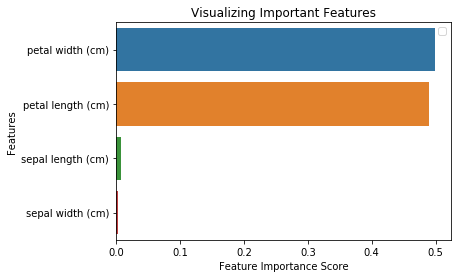

In [48]:
#Feature importance for Random Forest Model
# Creating a bar plot
sns.barplot(x=gb_feature_imp, y=gb_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [49]:
#Extra Trees
et_feature_imp = pd.Series(et.feature_importances_,index=df_feature_names.Feature_name).sort_values(ascending=False)
et_feature_imp

Feature_name
petal width (cm)     0.409116
petal length (cm)    0.393054
sepal length (cm)    0.140997
sepal width (cm)     0.056833
dtype: float64

No handles with labels found to put in legend.


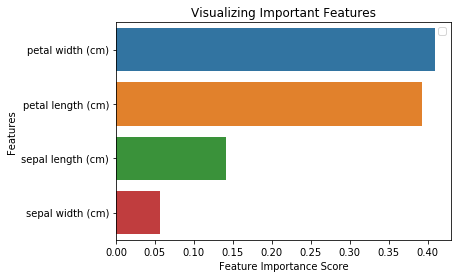

In [50]:
#Feature importance for Random Forest Model
# Creating a bar plot
sns.barplot(x=et_feature_imp, y=et_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Question 30. Did the GB or the XTrees model perform better than the Random Forest model? Do you have any reservations about the GB and/or the XTrees model? Why? What is the main difference between the RF and the GB models?-- answered in the document

In [51]:
# Accuracy comparision plot between Gradient Boosting, Xtrees and Random Forest model
models=[]
models.append(('Random Forest', rf))
models.append(('Gradient Boosting', gb))
models.append(('Extra Trees',et))
models

[('Random Forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=2, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('Gradient Boosting',
  GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=2,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=2000,
                n_iter_no_change=None, presort='auto', random_state=None,
                subsample=1.0, tol=0.0001, validation_fraction=0.1,


In [52]:
results = []
names = []
scoring = 'accuracy'
print('A list of each algorithm, the mean accuracy and the standard deviation accuracy.')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

A list of each algorithm, the mean accuracy and the standard deviation accuracy.
Random Forest: 0.933333 (0.073030)
Gradient Boosting: 0.933333 (0.073030)
Extra Trees: 0.873333 (0.124544)


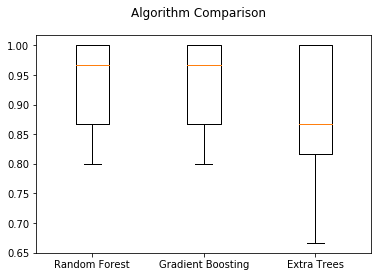

In [53]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#ax.set_xlabel='Algorithms'
#ax.set_ylabel='Accuracy'
plt.show()

Accuracy (train) for Gradient Boosting: 86.7% 
Accuracy (train) for Extra Trees: 83.3% 


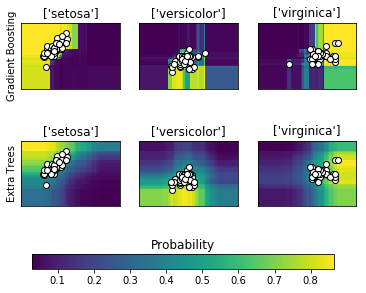

In [54]:
X = data2.data[:, 0:2]  # we only take the first two features for visualization
y = data2.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {'Gradient Boosting' : GradientBoostingClassifier(n_estimators=30, max_depth=3),
               'Extra Trees' : ExtraTreesClassifier(n_estimators=30, max_depth=3)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title(df_target_names.values[k])
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()